In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
np.random.seed(1)

In [3]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
#Importing the dataset 
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleaned.csv")
test=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest.csv")
test2=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest2.csv")

In [5]:
#Drop the useless column
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df.drop(['date'], axis=1, inplace =True)
df.drop(['DayName'], axis=1, inplace =True)

test.drop(['Unnamed: 0'], axis=1, inplace =True)
test.drop(['date'], axis=1, inplace =True)
test.drop(['DayName'], axis=1, inplace =True)

test2.drop(['Unnamed: 0'], axis=1, inplace =True)
test2.drop(['date'], axis=1, inplace =True)
test2.drop(['DayName'], axis=1, inplace =True)

In [6]:
#preparing the two datasets splitting the attributes with the class and selecting the right attributes
attributes = [col for col in df.columns if col != 'Occupancy']
X_train = df[attributes]
y_train = df['Occupancy']

attributes = [col for col in test.columns if col != 'Occupancy']
X_test = test[attributes]
y_test = test['Occupancy']

attributes = [col for col in test2.columns if col != 'Occupancy']
X_test2 = test2[attributes]
y_test2 = test2['Occupancy']

In [7]:
#Avoid the warnings
warnings.simplefilter("ignore")

In [8]:
#Split the training set in training and validation set for the validation of the model
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [9]:
#Define the model1
np.random.seed(1)
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(200, input_dim=n_feature, activation='sigmoid'))
    model.add(Dense(100, activation='sigmoid'))
    #model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
#instantiate the model and run it
np.random.seed(1)
model1 = build_model()

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=200).history

Train on 6514 samples, validate on 1629 samples
Epoch 1/100
6514/6514 [==============================] - 2s 280us/step - loss: 0.4795 - accuracy: 0.7897 - val_loss: 0.4200 - val_accuracy: 0.7796
Epoch 2/100
6514/6514 [==============================] - 0s 44us/step - loss: 0.3249 - accuracy: 0.8439 - val_loss: 0.2478 - val_accuracy: 0.9202
Epoch 3/100
6514/6514 [==============================] - 0s 43us/step - loss: 0.2045 - accuracy: 0.9311 - val_loss: 0.1841 - val_accuracy: 0.9319
Epoch 4/100
6514/6514 [==============================] - 0s 49us/step - loss: 0.1733 - accuracy: 0.9358 - val_loss: 0.1765 - val_accuracy: 0.9319
Epoch 5/100
6514/6514 [==============================] - 0s 49us/step - loss: 0.1643 - accuracy: 0.9397 - val_loss: 0.1945 - val_accuracy: 0.9288
Epoch 6/100
6514/6514 [==============================] - 0s 61us/step - loss: 0.1613 - accuracy: 0.9406 - val_loss: 0.1623 - val_accuracy: 0.9398
Epoch 7/100
6514/6514 [==============================] - 0s 45us/step - los

In [11]:
#Define the model2
np.random.seed(1)
def build_model2():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(60, input_dim=n_feature, activation='sigmoid'))
    model.add(Dense(40, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
#instantiate the model2 and run it
np.random.seed(1)
model2 = build_model2()

history2 = model2.fit(X_train, y_train, epochs=200, validation_data=(X_test2, y_test2), batch_size=100).history

Train on 6514 samples, validate on 9752 samples
Epoch 1/200
6514/6514 [==============================] - 3s 462us/step - loss: 0.5424 - accuracy: 0.7722 - val_loss: 0.5125 - val_accuracy: 0.7899
Epoch 2/200
6514/6514 [==============================] - 1s 106us/step - loss: 0.5077 - accuracy: 0.7897 - val_loss: 0.5074 - val_accuracy: 0.7899
Epoch 3/200
6514/6514 [==============================] - 2s 230us/step - loss: 0.4889 - accuracy: 0.7897 - val_loss: 0.4968 - val_accuracy: 0.7899
Epoch 4/200
6514/6514 [==============================] - 1s 116us/step - loss: 0.4528 - accuracy: 0.7897 - val_loss: 0.4837 - val_accuracy: 0.7899
Epoch 5/200
6514/6514 [==============================] - 1s 167us/step - loss: 0.4127 - accuracy: 0.7897 - val_loss: 0.4824 - val_accuracy: 0.7899
Epoch 6/200
6514/6514 [==============================] - 2s 238us/step - loss: 0.3669 - accuracy: 0.7897 - val_loss: 0.4758 - val_accuracy: 0.7899
Epoch 7/200
6514/6514 [==============================] - 1s 121us/step

Epoch 112/200
6514/6514 [==============================] - 0s 76us/step - loss: 0.0492 - accuracy: 0.9880 - val_loss: 0.2931 - val_accuracy: 0.8831
Epoch 113/200
6514/6514 [==============================] - 0s 76us/step - loss: 0.0486 - accuracy: 0.9873 - val_loss: 0.2498 - val_accuracy: 0.9061
Epoch 114/200
6514/6514 [==============================] - 0s 73us/step - loss: 0.0499 - accuracy: 0.9879 - val_loss: 0.2398 - val_accuracy: 0.9020
Epoch 115/200
6514/6514 [==============================] - 0s 75us/step - loss: 0.0492 - accuracy: 0.9876 - val_loss: 0.1825 - val_accuracy: 0.9355
Epoch 116/200
6514/6514 [==============================] - 0s 72us/step - loss: 0.0469 - accuracy: 0.9880 - val_loss: 0.3299 - val_accuracy: 0.8712
Epoch 117/200
6514/6514 [==============================] - 0s 71us/step - loss: 0.0471 - accuracy: 0.9874 - val_loss: 0.3430 - val_accuracy: 0.8698
Epoch 118/200
6514/6514 [==============================] - 1s 78us/step - loss: 0.0466 - accuracy: 0.9882 - val_

In [13]:
#Define the model3
np.random.seed(1)
def build_model3():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(100, input_dim=n_feature, activation='sigmoid'))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(25, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
#instantiate the model3 and run it
np.random.seed(1)
model3 = build_model3()

history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=100).history

Train on 6514 samples, validate on 1629 samples
Epoch 1/50
6514/6514 [==============================] - 2s 349us/step - loss: 0.5221 - accuracy: 0.7897 - val_loss: 0.5205 - val_accuracy: 0.7796
Epoch 2/50
6514/6514 [==============================] - 0s 61us/step - loss: 0.4911 - accuracy: 0.7897 - val_loss: 0.4656 - val_accuracy: 0.7796
Epoch 3/50
6514/6514 [==============================] - 0s 61us/step - loss: 0.3742 - accuracy: 0.7981 - val_loss: 0.2845 - val_accuracy: 0.9171
Epoch 4/50
6514/6514 [==============================] - 0s 62us/step - loss: 0.2225 - accuracy: 0.9363 - val_loss: 0.1937 - val_accuracy: 0.9349
Epoch 5/50
6514/6514 [==============================] - 0s 66us/step - loss: 0.1750 - accuracy: 0.9397 - val_loss: 0.1699 - val_accuracy: 0.9411
Epoch 6/50
6514/6514 [==============================] - 0s 77us/step - loss: 0.1662 - accuracy: 0.9421 - val_loss: 0.1658 - val_accuracy: 0.9435
Epoch 7/50
6514/6514 [==============================] - 1s 103us/step - loss: 0.1

In [15]:
#Testing the three model and evaluation of them
test_loss_tra1, test_acc_tra1 = model1.evaluate(X_train, y_train)
test_loss_tra2, test_acc_tra2 = model2.evaluate(X_train, y_train)
test_loss_tra3, test_acc_tra3 = model3.evaluate(X_train, y_train)

test_loss_11, test_acc_11 = model1.evaluate(X_test, y_test)
test_loss_21, test_acc_21 = model2.evaluate(X_test, y_test)
test_loss_31, test_acc_31 = model3.evaluate(X_test, y_test)

test_loss_12, test_acc_12 = model1.evaluate(X_test2, y_test2)
test_loss_22, test_acc_22 = model2.evaluate(X_test2, y_test2)
test_loss_32, test_acc_32 = model3.evaluate(X_test2, y_test2)
print()
print('train')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_tra1, test_acc_tra1))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_tra2, test_acc_tra2))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_tra3, test_acc_tra3))
print()
print('test1')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_11, test_acc_11))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_21, test_acc_21))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_31, test_acc_31))
print()
print('test2')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_12, test_acc_12))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_22, test_acc_22))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_32, test_acc_32))

9752/9752 [==============================] - 1s 56us/step

train
MODEL1: Loss 0.044432, Accuracy 0.987565
MODEL2: Loss 0.042652, Accuracy 0.987719
MODEL3: Loss 0.045061, Accuracy 0.988333

test1
MODEL1: Loss 0.081399, Accuracy 0.978612
MODEL2: Loss 0.083040, Accuracy 0.977861
MODEL3: Loss 0.078978, Accuracy 0.978612

test2
MODEL1: Loss 0.281544, Accuracy 0.916838
MODEL2: Loss 0.126159, Accuracy 0.945652
MODEL3: Loss 0.347138, Accuracy 0.879820


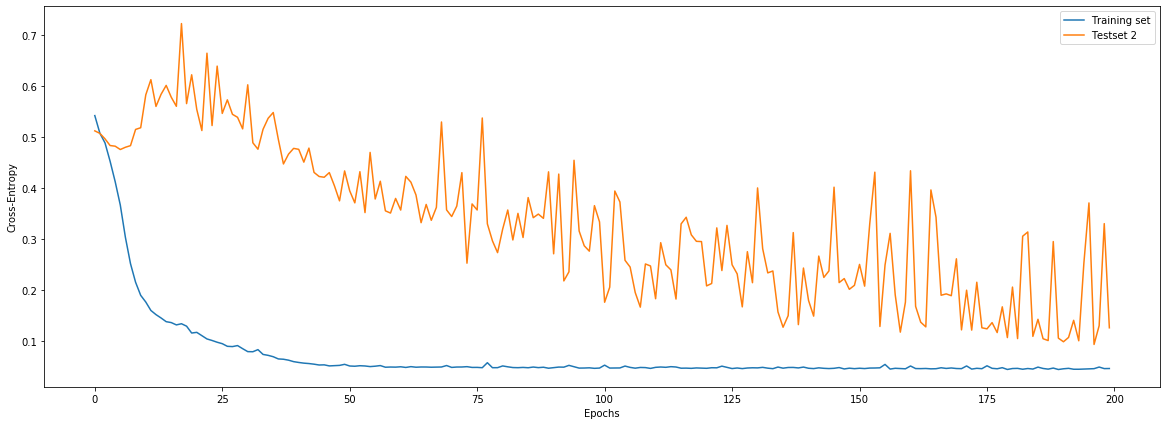

In [41]:
#See if we have overfitting
plt.figure(figsize=(20,7))
#plt.plot(history1['loss'], label='Train1')
#plt.plot(history1['val_loss'], label='Val1')
plt.plot(history2['loss'], label='Training set')
plt.plot(history2['val_loss'], label='Testset 2')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

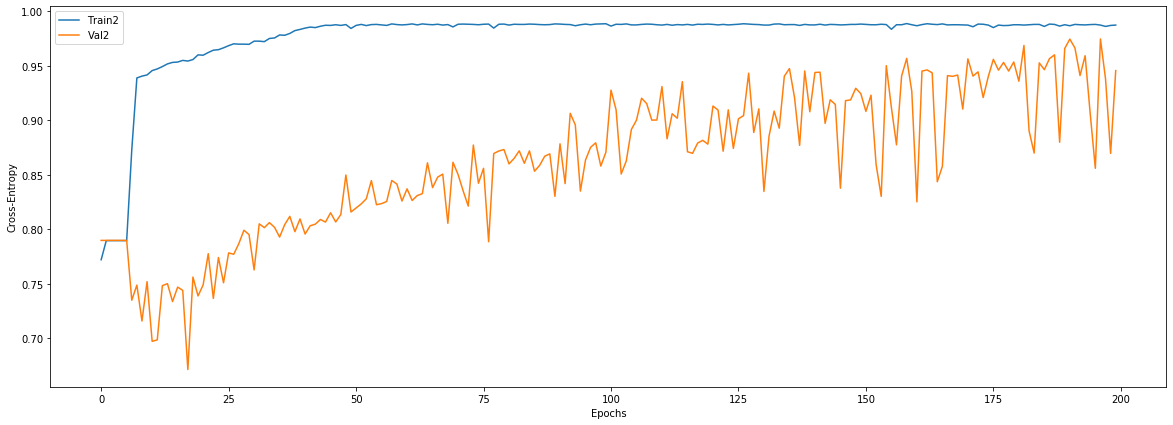

In [40]:
#See if we have overfitting
plt.figure(figsize=(20,7))
#plt.plot(history1['loss'], label='Train1')
#plt.plot(history1['val_loss'], label='Val1')
plt.plot(history2['accuracy'], label='Train2')
plt.plot(history2['val_accuracy'], label='Val2')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [17]:
#See the prediction of the model1 in the old way
y_pred = model1.predict_classes(X_train)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print()

y_pred1 = model1.predict_classes(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred1))
print('F1-score %s' % f1_score(y_test, y_pred1, average=None))
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print()

y_pred2 = model1.predict_classes(X_test2)

print('Accuracy %s' % accuracy_score(y_test2, y_pred2))
print('F1-score %s' % f1_score(y_test2, y_pred2, average=None))
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

Accuracy 0.9875652440896531
F1-score [0.99208753 0.97097814]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5144
           1       0.95      0.99      0.97      1370

    accuracy                           0.99      6514
   macro avg       0.98      0.99      0.98      6514
weighted avg       0.99      0.99      0.99      6514

[[5078   66]
 [  15 1355]]

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

[[1639   54]
 [   3  969]]

Accuracy 0.9168375717801477
F1-score [0.94493108 0.83022818]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      770

In [18]:
#See the prediction of the model2 in the old way
y_pred = model2.predict_classes(X_train)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print()

y_pred1 = model2.predict_classes(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred1))
print('F1-score %s' % f1_score(y_test, y_pred1, average=None))
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print()

y_pred2 = model2.predict_classes(X_test2)

print('Accuracy %s' % accuracy_score(y_test2, y_pred2))
print('F1-score %s' % f1_score(y_test2, y_pred2, average=None))
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

Accuracy 0.9877187595947191
F1-score [0.99218597 0.97132616]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5144
           1       0.95      0.99      0.97      1370

    accuracy                           0.99      6514
   macro avg       0.98      0.99      0.98      6514
weighted avg       0.99      0.99      0.99      6514

[[5079   65]
 [  15 1355]]

Accuracy 0.9778611632270169
F1-score [0.98231945 0.97039639]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

[[1639   54]
 [   5  967]]

Accuracy 0.9456521739130435
F1-score [0.96471841 0.88174922]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      770

In [19]:
#Print the roc value

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()
fpr, tpr, _ = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred1, average=None)

0.9814799622750663


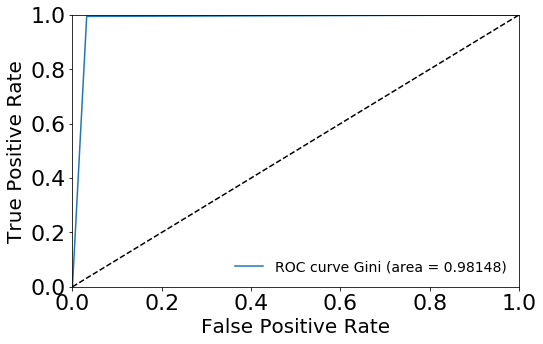

In [20]:
#Plotting the graph of the Roc curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve Gini (area = %0.5f)' % roc_auc)
#plt.plot(fprE, tprE, label='ROC curve Gain (area = %0.5f)' % (roc_aucE))
#plt.plot(fprRF, tprRF, label='ROC curve Random Forest (area = %0.5f)' % (roc_aucRF))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [48]:
#early stopping

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2

np.random.seed(1)

es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model2()
history4 = model4.fit(X_train, y_train, validation_data=(X_test2, y_test2), epochs=200, 
                      batch_size=100, callbacks=[es,mc]).history

Train on 6514 samples, validate on 9752 samples
Epoch 1/200
6514/6514 [==============================] - 2s 363us/step - loss: 0.5765 - accuracy: 0.6937 - val_loss: 0.5016 - val_accuracy: 0.7899
Epoch 2/200
6514/6514 [==============================] - 0s 72us/step - loss: 0.4644 - accuracy: 0.7897 - val_loss: 0.4817 - val_accuracy: 0.7899
Epoch 3/200
6514/6514 [==============================] - 0s 72us/step - loss: 0.4046 - accuracy: 0.7897 - val_loss: 0.4644 - val_accuracy: 0.7899
Epoch 4/200
6514/6514 [==============================] - 0s 73us/step - loss: 0.3355 - accuracy: 0.7928 - val_loss: 0.4580 - val_accuracy: 0.7347
Epoch 5/200
6514/6514 [==============================] - 0s 74us/step - loss: 0.2651 - accuracy: 0.9275 - val_loss: 0.4944 - val_accuracy: 0.7447
Epoch 6/200
6514/6514 [==============================] - 1s 80us/step - loss: 0.2176 - accuracy: 0.9354 - val_loss: 0.5192 - val_accuracy: 0.7420
Epoch 7/200
6514/6514 [==============================] - 0s 73us/step - los

In [49]:
#Testing the three model and evaluation of them
test_loss_tra4, test_acc_tra4 = model4.evaluate(X_train, y_train)
test_loss_41, test_acc_41 = model4.evaluate(X_test, y_test)
test_loss_42, test_acc_42 = model4.evaluate(X_test2, y_test2)


print()
print('train')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_tra1, test_acc_tra1))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_tra2, test_acc_tra2))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_tra3, test_acc_tra3))
print('Early Stopping: Loss %f, Accuracy %f' % (test_loss_tra4, test_acc_tra4))
print()
print('test1')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_11, test_acc_11))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_21, test_acc_21))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_31, test_acc_31))
print('Early Stopping: Loss %f, Accuracy %f' % (test_loss_41, test_acc_41))
print()
print('test2')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_12, test_acc_12))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_22, test_acc_22))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_32, test_acc_32))
print('Early Stopping: Loss %f, Accuracy %f' % (test_loss_42, test_acc_42))

9752/9752 [==============================] - 0s 50us/step

train
MODEL1: Loss 0.044432, Accuracy 0.987565
MODEL2: Loss 0.042652, Accuracy 0.987719
MODEL3: Loss 0.045061, Accuracy 0.988333
Early Stopping: Loss 0.139281, Accuracy 0.943660

test1
MODEL1: Loss 0.081399, Accuracy 0.978612
MODEL2: Loss 0.083040, Accuracy 0.977861
MODEL3: Loss 0.078978, Accuracy 0.978612
Early Stopping: Loss 0.206689, Accuracy 0.919325

test2
MODEL1: Loss 0.281544, Accuracy 0.916838
MODEL2: Loss 0.126159, Accuracy 0.945652
MODEL3: Loss 0.347138, Accuracy 0.879820
Early Stopping: Loss 0.622208, Accuracy 0.697190


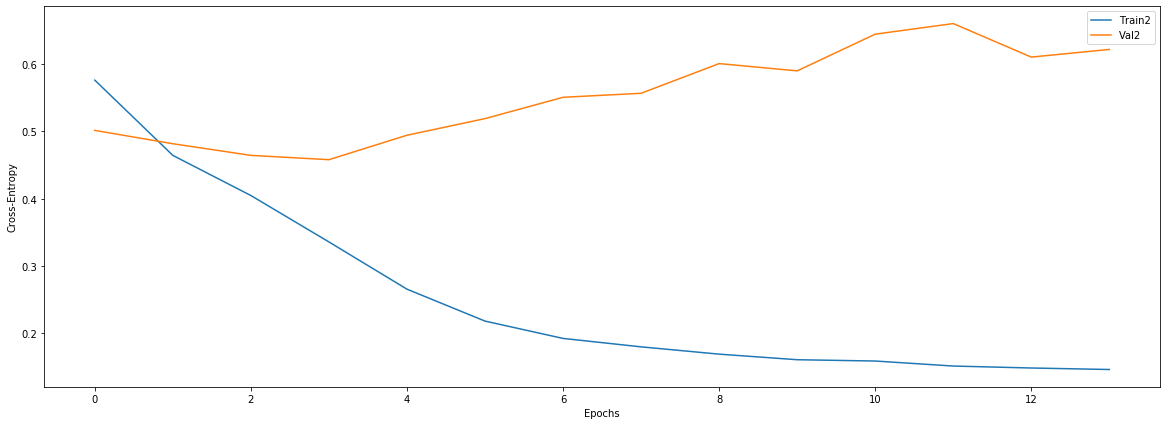

In [50]:
#See if we have overfitting
plt.figure(figsize=(20,7))
#plt.plot(history1['loss'], label='Train1')
#plt.plot(history1['val_loss'], label='Val1')
plt.plot(history4['loss'], label='Train2')
plt.plot(history4['val_loss'], label='Val2')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [32]:
#Define the modelLR
np.random.seed(1)

def build_modelLR():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(60, input_dim=n_feature, activation='sigmoid', kernel_regularizer=l2(0.9)))
    model.add(Dense(40, activation='sigmoid', kernel_regularizer=l2(0.9)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.9)))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [33]:
np.random.seed(1)
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_modelLR()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_test2, y_test2), epochs=200, 
                    batch_size=100, callbacks=[es,mc]).history

Train on 6514 samples, validate on 9752 samples
Epoch 1/200
6514/6514 [==============================] - 4s 622us/step - loss: 39.7175 - accuracy: 0.2742 - val_loss: 25.3388 - val_accuracy: 0.7899
Epoch 2/200
6514/6514 [==============================] - 1s 93us/step - loss: 17.2800 - accuracy: 0.7897 - val_loss: 10.7960 - val_accuracy: 0.7899
Epoch 3/200
6514/6514 [==============================] - 1s 89us/step - loss: 7.2979 - accuracy: 0.7897 - val_loss: 4.5364 - val_accuracy: 0.7899
Epoch 4/200
6514/6514 [==============================] - 1s 99us/step - loss: 3.1126 - accuracy: 0.7897 - val_loss: 2.0144 - val_accuracy: 0.7899
Epoch 5/200
6514/6514 [==============================] - 1s 103us/step - loss: 1.4747 - accuracy: 0.7897 - val_loss: 1.0670 - val_accuracy: 0.7899
Epoch 6/200
6514/6514 [==============================] - 1s 87us/step - loss: 0.8748 - accuracy: 0.7897 - val_loss: 0.7314 - val_accuracy: 0.7899
Epoch 7/200
6514/6514 [==============================] - 1s 97us/step 

In [34]:
#Testing the three model and evaluation of them
test_loss_tra5, test_acc_tra5 = L2_model.evaluate(X_train, y_train)
test_loss_51, test_acc_51 = L2_model.evaluate(X_test, y_test)
test_loss_52, test_acc_52 = L2_model.evaluate(X_test2, y_test2)


print()
print('train')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_tra1, test_acc_tra1))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_tra2, test_acc_tra2))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_tra3, test_acc_tra3))
print('Early Stopping: Loss %f, Accuracy %f' % (test_loss_tra4, test_acc_tra4))
print('L2 MODEL: Loss %f, Accuracy %f' % (test_loss_tra5, test_acc_tra5))
print()
print('test1')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_11, test_acc_11))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_21, test_acc_21))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_31, test_acc_31))
print('Early Stopping: Loss %f, Accuracy %f' % (test_loss_41, test_acc_41))
print('L2 MODEL: Loss %f, Accuracy %f' % (test_loss_51, test_acc_51))
print()
print('test2')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_12, test_acc_12))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_22, test_acc_22))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_32, test_acc_32))
print('Early Stopping: Loss %f, Accuracy %f' % (test_loss_42, test_acc_42))
print('L2 MODEL: Loss %f, Accuracy %f' % (test_loss_52, test_acc_52))

9752/9752 [==============================] - 1s 104us/step

train
MODEL1: Loss 0.044432, Accuracy 0.987565
MODEL2: Loss 0.042652, Accuracy 0.987719
MODEL3: Loss 0.045061, Accuracy 0.988333
Early Stopping: Loss 0.050291, Accuracy 0.986798
L2 MODEL: Loss 0.514390, Accuracy 0.789684

test1
MODEL1: Loss 0.081399, Accuracy 0.978612
MODEL2: Loss 0.083040, Accuracy 0.977861
MODEL3: Loss 0.078978, Accuracy 0.978612
Early Stopping: Loss 0.087805, Accuracy 0.978612
L2 MODEL: Loss 0.720215, Accuracy 0.635272

test2
MODEL1: Loss 0.281544, Accuracy 0.916838
MODEL2: Loss 0.126159, Accuracy 0.945652
MODEL3: Loss 0.347138, Accuracy 0.879820
Early Stopping: Loss 0.340183, Accuracy 0.861464
L2 MODEL: Loss 0.514116, Accuracy 0.789889


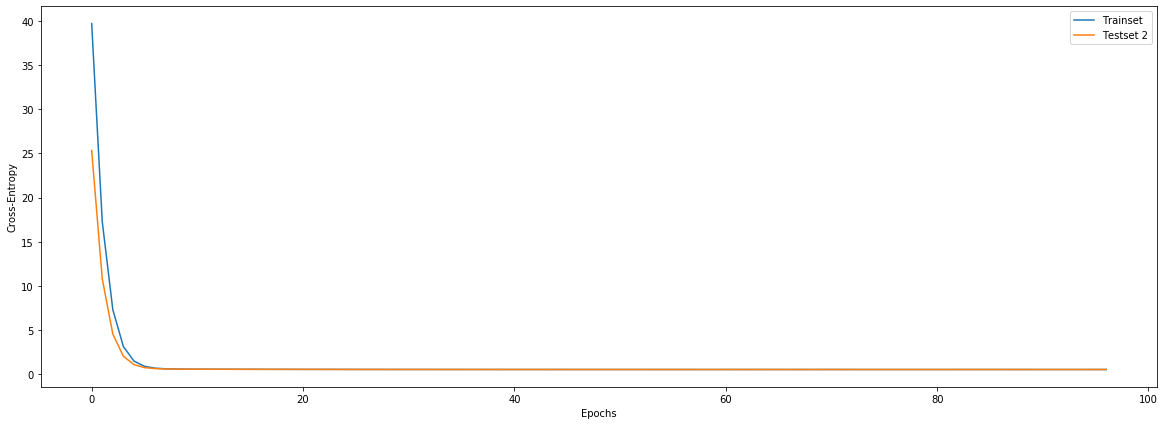

In [51]:
#See if we have overfitting
plt.figure(figsize=(20,7))
#plt.plot(history1['loss'], label='Train1')
#plt.plot(history1['val_loss'], label='Val1')
plt.plot(h_L2['loss'], label='Trainset')
plt.plot(h_L2['val_loss'], label='Testset 2')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [42]:
from keras.layers import Dropout
np.random.seed(1)

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(60, input_dim=n_feature, activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(Dense(40, activation='sigmoid'))
    model.add(Dropout(0.9))
    model.add(Dense(1, activation='sigmoid'))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [45]:
np.random.seed(1)
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_test2, y_test2), 
                              epochs=300, batch_size=100, callbacks=[es,mc]).history

Train on 6514 samples, validate on 9752 samples
Epoch 1/300
6514/6514 [==============================] - 4s 587us/step - loss: 0.9770 - accuracy: 0.5970 - val_loss: 0.5156 - val_accuracy: 0.7899
Epoch 2/300
6514/6514 [==============================] - 1s 98us/step - loss: 0.6703 - accuracy: 0.6778 - val_loss: 0.5195 - val_accuracy: 0.7899
Epoch 3/300
6514/6514 [==============================] - 1s 98us/step - loss: 0.5925 - accuracy: 0.7129 - val_loss: 0.5156 - val_accuracy: 0.7899
Epoch 4/300
6514/6514 [==============================] - 1s 152us/step - loss: 0.5588 - accuracy: 0.7384 - val_loss: 0.5100 - val_accuracy: 0.7899
Epoch 5/300
6514/6514 [==============================] - 1s 98us/step - loss: 0.5349 - accuracy: 0.7599 - val_loss: 0.5045 - val_accuracy: 0.7899
Epoch 6/300
6514/6514 [==============================] - 1s 103us/step - loss: 0.5232 - accuracy: 0.7753 - val_loss: 0.4975 - val_accuracy: 0.7899
Epoch 7/300
6514/6514 [==============================] - 1s 142us/step - 

In [46]:
#Testing the three model and evaluation of them
test_loss_tra6, test_acc_tra6 = DROPOUT_model.evaluate(X_train, y_train)
test_loss_61, test_acc_61 = DROPOUT_model.evaluate(X_test, y_test)
test_loss_62, test_acc_62 = DROPOUT_model.evaluate(X_test2, y_test2)


print()
print('train')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_tra1, test_acc_tra1))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_tra2, test_acc_tra2))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_tra3, test_acc_tra3))
print('Early Stopping: Loss %f, Accuracy %f' % (test_loss_tra4, test_acc_tra4))
print('L2 MODEL: Loss %f, Accuracy %f' % (test_loss_tra5, test_acc_tra5))
print('DROPOUT MODEL: Loss %f, Accuracy %f' % (test_loss_tra6, test_acc_tra6))
print()
print('test1')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_11, test_acc_11))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_21, test_acc_21))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_31, test_acc_31))
print('Early Stopping: Loss %f, Accuracy %f' % (test_loss_41, test_acc_41))
print('L2 MODEL: Loss %f, Accuracy %f' % (test_loss_51, test_acc_51))
print('DROPOUT MODEL: Loss %f, Accuracy %f' % (test_loss_61, test_acc_61))
print()
print('test2')
print('MODEL1: Loss %f, Accuracy %f' % (test_loss_12, test_acc_12))
print('MODEL2: Loss %f, Accuracy %f' % (test_loss_22, test_acc_22))
print('MODEL3: Loss %f, Accuracy %f' % (test_loss_32, test_acc_32))
print('Early Stopping: Loss %f, Accuracy %f' % (test_loss_42, test_acc_42))
print('L2 MODEL: Loss %f, Accuracy %f' % (test_loss_52, test_acc_52))
print('DROPOUT MODEL: Loss %f, Accuracy %f' % (test_loss_62, test_acc_62))

9752/9752 [==============================] - 0s 48us/step

train
MODEL1: Loss 0.044432, Accuracy 0.987565
MODEL2: Loss 0.042652, Accuracy 0.987719
MODEL3: Loss 0.045061, Accuracy 0.988333
Early Stopping: Loss 0.050291, Accuracy 0.986798
L2 MODEL: Loss 0.514390, Accuracy 0.789684
DROPOUT MODEL: Loss 0.175241, Accuracy 0.948419

test1
MODEL1: Loss 0.081399, Accuracy 0.978612
MODEL2: Loss 0.083040, Accuracy 0.977861
MODEL3: Loss 0.078978, Accuracy 0.978612
Early Stopping: Loss 0.087805, Accuracy 0.978612
L2 MODEL: Loss 0.720215, Accuracy 0.635272
DROPOUT MODEL: Loss 0.270094, Accuracy 0.929456

test2
MODEL1: Loss 0.281544, Accuracy 0.916838
MODEL2: Loss 0.126159, Accuracy 0.945652
MODEL3: Loss 0.347138, Accuracy 0.879820
Early Stopping: Loss 0.340183, Accuracy 0.861464
L2 MODEL: Loss 0.514116, Accuracy 0.789889
DROPOUT MODEL: Loss 0.474442, Accuracy 0.724774


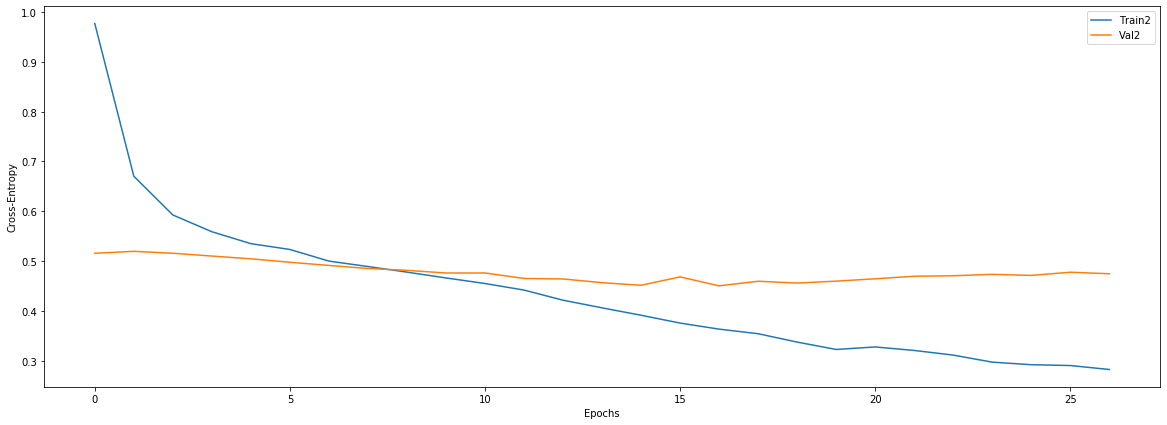

In [47]:
#See if we have overfitting
plt.figure(figsize=(20,7))
#plt.plot(history1['loss'], label='Train1')
#plt.plot(history1['val_loss'], label='Val1')
plt.plot(h_DROPOUT['loss'], label='Train2')
plt.plot(h_DROPOUT['val_loss'], label='Val2')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()